###1.environment setting

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


DATA_PATH = "/content/drive/My Drive/kaggle project/house-prices-advanced-regression-techniques"

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/kaggle project/house-prices-advanced-regression-techniques"

data_description.txt  sample_submission.csv  test.csv  train.csv


In [ ]:

trainset = pd.read_csv("/content/drive/My Drive/kaggle project/house-prices-advanced-regression-techniques/train.csv")
testset = pd.read_csv("/content/drive/My Drive/kaggle project/house-prices-advanced-regression-techniques/test.csv")
samplesubmission = pd.read_csv("/content/drive/My Drive/kaggle project/house-prices-advanced-regression-techniques/sample_submission.csv")

###2.data inspection

In [ ]:
trainset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
trainset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


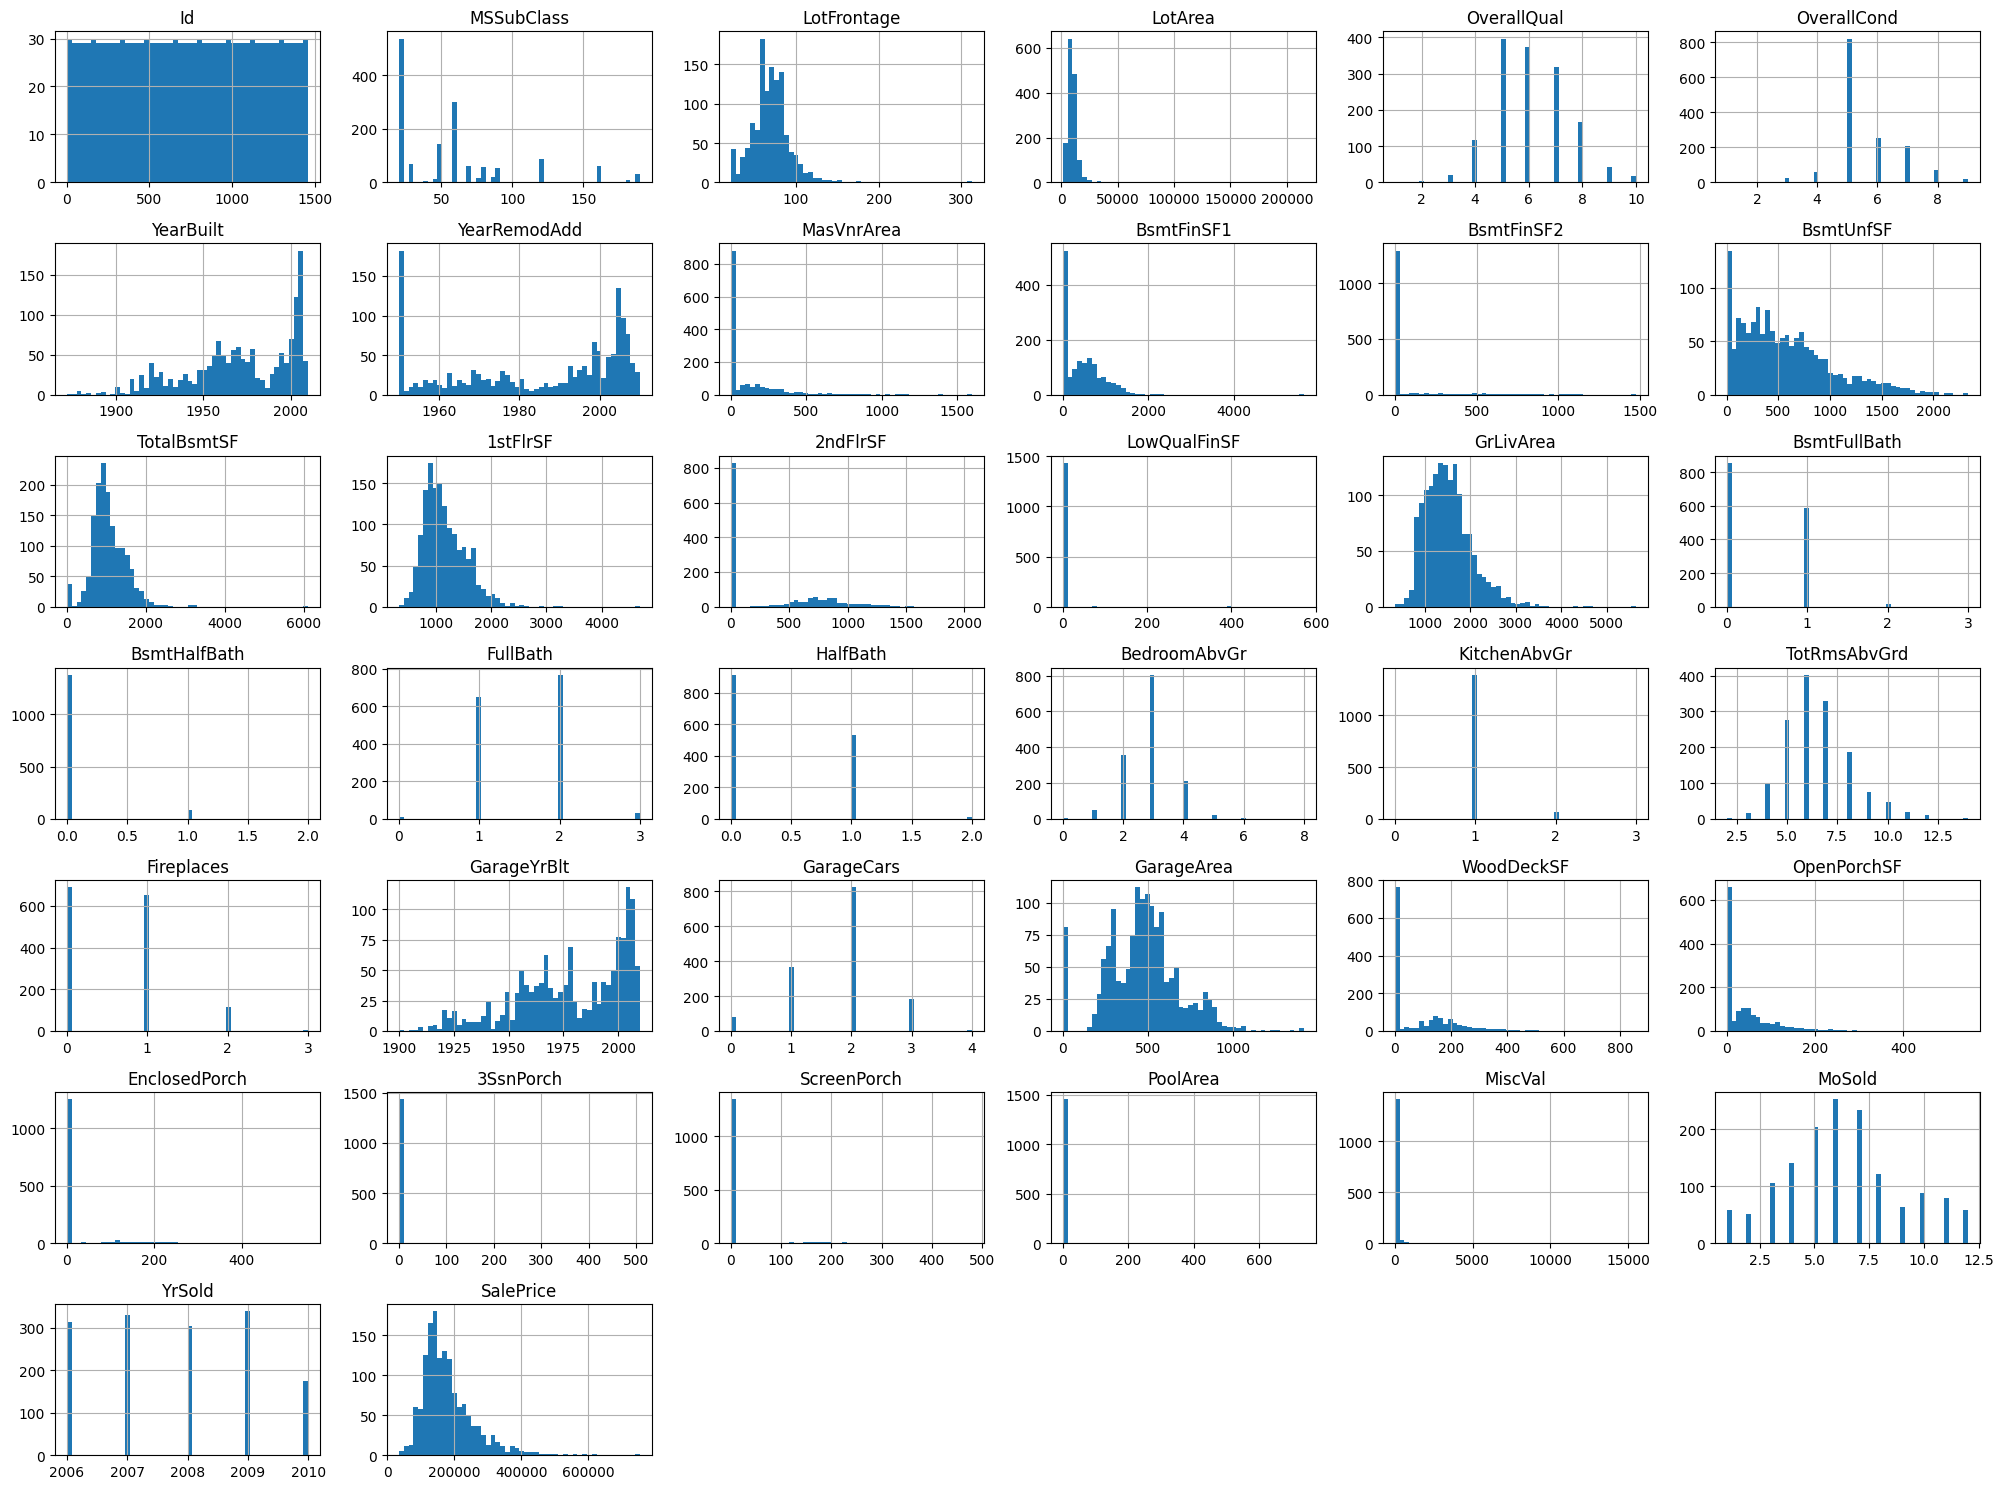

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
trainset.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

3.data preparation

*   missing values
*   cluster object type
*   one hot encoding (categorical data)
*   train/val/test





In [ ]:
obj_attribute =trainset.select_dtypes(include='object')
obj_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

train/val set

In [ ]:
#1.Converting training set instances into features (X) and labels (y)
y = trainset.SalePrice
X = trainset.drop(labels='SalePrice', 'Id', axis=1)

In [ ]:
#2.Converting X and y into X_train, X_test and y_train,y_test
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


log transformation

In [ ]:
imp_attributes = ['OverallQual', 'YearBuilt','YearRemodAdd', 'MasVnrArea','TotalBsmtSF','1stFlrSF',
                  'GrLivArea', 'FullBath','TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']
rest_attributes = [col for col in X.columns if col not in selected_features]
train_X_imp = train_X[imp_attributes]
val_X_imp = val_X[imp_attributes]

In [ ]:
# Apply log transformation to the data
log_train_X_imp = np.log(train_X_imp)

log_y_train = np.log(y_train)

Clean Outliers

In [ ]:
q_low = log_train_X_imp["col"].quantile(0.25)
q_hi  = log_train_X_imp["col"].quantile(0.75)

train_x_filtered = df[(log_train_X_imp["col"] < q_hi) & (log_train_X_imp["col"] > q_low)]

find distribution of X relative to Y

In [ ]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')

features = list(train_x_filtered.columns)
spearman(train_x_filtered, features)

Clearing missing values of numerical features

In [ ]:
from sklearn.impute import SimpleImputer
def missing_numerical(X_train):
    imputer = SimpleImputer(strategy="median") #a. creating imputer instance

    X_num = X_train.select_dtypes(include=['int64','float64']) #choosing num attributes
    imputer.fit(X_num) #b. fitting
    # It computed the mean of each attribute and stored the result in statistics_ instance variable

    X = imputer.transform(X_num) #c. transformed the data as per requirement and generated a plain np array
    train_X = pd.DataFrame(X, columns=X_num.columns)
    return train_X
train_X = missing_numerical(X_train)
val_X = missing_numerical(X_val)

In [ ]:
train_X

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1450.0,180.0,21.0,1533.0,5.0,7.0,1970.0,1970.0,0.0,553.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2006.0
1,539.0,20.0,70.0,11553.0,5.0,5.0,1968.0,1968.0,188.0,673.0,...,336.0,466.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2006.0
2,1209.0,20.0,70.0,7763.0,5.0,7.0,1962.0,1980.0,0.0,504.0,...,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2008.0
3,817.0,20.0,70.0,11425.0,5.0,6.0,1954.0,1954.0,0.0,486.0,...,275.0,0.0,0.0,120.0,0.0,0.0,0.0,0.0,7.0,2006.0
4,165.0,40.0,40.0,5400.0,6.0,7.0,1926.0,2004.0,0.0,370.0,...,216.0,0.0,0.0,183.0,0.0,0.0,0.0,0.0,10.0,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,775.0,20.0,110.0,14226.0,8.0,5.0,2006.0,2006.0,375.0,0.0,...,895.0,315.0,45.0,0.0,0.0,0.0,0.0,0.0,7.0,2007.0
1164,491.0,160.0,70.0,2665.0,5.0,6.0,1976.0,1976.0,0.0,0.0,...,336.0,141.0,24.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0
1165,50.0,20.0,66.0,7742.0,5.0,7.0,1966.0,1966.0,0.0,763.0,...,386.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2007.0
1166,1260.0,20.0,65.0,9750.0,6.0,8.0,1969.0,1969.0,0.0,602.0,...,460.0,180.0,0.0,0.0,0.0,80.0,0.0,0.0,7.0,2008.0


4.model selection


In [ ]:
dict_mse={} #creating Mean Squared Error Dictionary

In [ ]:
from sklearn.metrics import mean_squared_error

def model_application(model, model_name, train_X, y_train, val_X, y_val):
    model.fit(train_X, y_train)

    predictions = model.predict(val_X)

    mse = mean_squared_error(y_val, predictions)
    dict_mse[model_name] = np.sqrt(mse) #root_mean_squared_error
    dict_mse[model_name]
    return model  #returning trained model

In [ ]:
dict_mse={} #creating Mean Squared Error Dictionary


In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model = model_application(lr_model, 'Linear Regression', train_X_imp, y_train, val_X_imp, y_val)
lr_model_imp = LinearRegression()
lr_model = model_application(lr_model_imp, 'Linear Regression for important attributes', train_X, y_train, val_X, y_val)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg = model_application(forest_reg, 'Random Forest Regressor', train_X, y_train, val_X, y_val)
forest_reg_imp = RandomForestRegressor()
forest_reg_imp = model_application(forest_reg_imp, 'Random Forest Regressor for important attributes', train_X_imp, y_train, val_X_imp, y_val)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg = model_application(tree_reg, 'Decision Tree Regressor for important attributes', train_X_imp, y_train, val_X_imp, y_val)
tree_reg_imp = DecisionTreeRegressor()
tree_reg = model_application(tree_reg_imp, 'Decision Tree Regressor', train_X, y_train, val_X, y_val)

In [ ]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg = model_application(xgb_reg, 'XGBoost Regressor', train_X, y_train, val_X, y_val)
xgb_reg_imp = XGBRegressor()
xgb_reg_imp = model_application(xgb_reg_imp, 'XGBoost Regressor for important attributes', train_X_imp, y_train, val_X_imp, y_val)

In [ ]:
dict_mse

{'Linear Regression': 48787.381235482484,
 'Linear Regression for important attributes': 50624.98829019631,
 'Random Forest Regressor': 32276.61373724122,
 'Random Forest Regressor for important attributes': 33982.4135846535,
 'Decision Tree Regressor for important attributes': 42976.39244439029,
 'Decision Tree Regressor': 36513.67781651632,
 'XGBoost Regressor': 31337.718886309416,
 'XGBoost Regressor for important attributes': 29152.37031288916}

4.train/tune with various model

In [ ]:
test_X = missing_numerical(testset) #dealing with numerical missing values
test_X_imp = test_X[imp_attributes]

my_result = forest_reg.predict(test_X) #predicting


In [ ]:
# Saving the result into submission file
submission = pd.read_csv("/content/drive/My Drive/kaggle project/house-prices-advanced-regression-techniques/sample_submission.csv")
submission["SalePrice"] = my_result
submission.to_csv('submission.csv', index=False)  #Competition rules require that no index number be savedmodel.fit()


In [ ]:
samplesubmission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


5.feature selection

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def find_optimal_num_components(train_X, max_components=None, plot=True):
    # Standardize the data
    scaler = StandardScaler()
    train_X_scaled = scaler.fit_transform(train_X)

    # Apply PCA
    pca = PCA()
    pca.fit(train_X_scaled)

    # Calculate cumulative explained variance ratio
    explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

    # Plot explained variance ratio curve
    if plot:
        plt.figure(figsize=(8, 6))
        plt.plot(range(1, len(explained_variance_ratio_cumsum) + 1), explained_variance_ratio_cumsum, marker='o')
        plt.title('Explained Variance Ratio Cumulative Sum')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance Ratio')
        plt.grid(True)
        plt.show()

    # Find the optimal number of components
    if max_components is None:
        optimal_num_components = np.argmax(explained_variance_ratio_cumsum >= 0.95) + 1
    else:
        optimal_num_components = max_components

    return optimal_num_components


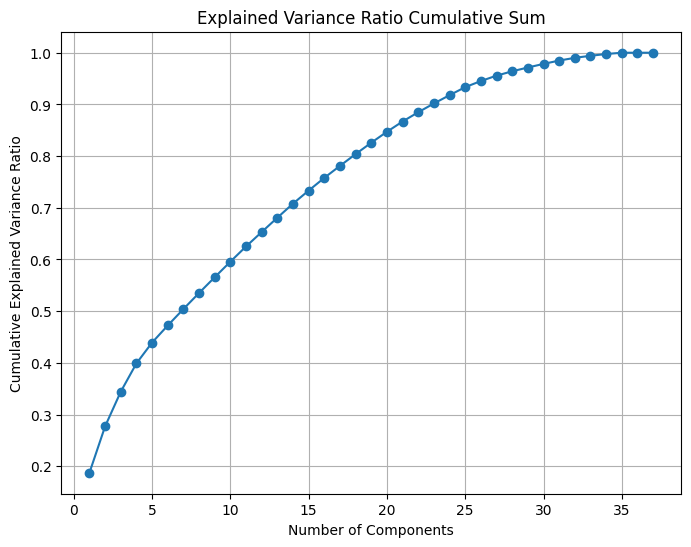

Optimal number of components: 27


In [ ]:
# Assuming X_train is your training dataset
optimal_components = find_optimal_num_components(train_X)
print("Optimal number of components:", optimal_components)

6.test and see differences

In [ ]:

# Assuming X_train and X_val are your train and validation datasets
# Standardize the data
s = StandardScaler()
train_X_scaled = s.fit_transform(train_X)
val_X_scaled = s.transform(val_X)

# Apply PCA
num_components = 27  # Choose the number of principal components
pca = PCA(n_components=num_components)
train_X_pca = pca.fit_transform(train_X_scaled)
val_X_pca = pca.transform(val_X_scaled)


In [ ]:
pca

PCA(n_components=27)

In [ ]:
train_X_pca


array([[-5.06825495, -1.59485037, -2.35738872, ...,  0.11312194,
         0.90982127,  0.03841437],
       [-0.68025625, -0.45744824,  0.71039962, ..., -1.10070178,
        -0.76314185,  0.17819333],
       [-1.29246603, -1.30424527,  0.69265009, ...,  0.83067303,
        -0.14178123, -0.46855546],
       ...,
       [-2.57159973, -1.27485408,  0.73357365, ...,  0.73309673,
         0.03512506, -0.24056149],
       [-1.21916364, -1.27002836,  1.02174798, ...,  0.33666471,
        -0.14193615,  0.08121947],
       [ 1.4856287 , -2.18086878,  0.99180656, ..., -0.37193021,
        -1.25154593, -0.66416988]])

In [ ]:
val_X_pca

array([[ 0.10641499, -2.23562593, -0.67283949, ...,  0.81503155,
        -0.49997102, -0.74501102],
       [-1.15328766, -3.28788517, -2.37067192, ..., -1.36412214,
         0.32645127, -0.68818454],
       [-0.82303142, -1.11998786,  0.25529503, ...,  0.53643433,
        -0.2170584 , -0.28732892],
       ...,
       [-2.49406899, -0.96087635, -0.14464881, ...,  0.38803057,
        -0.42042983, -0.03387971],
       [ 0.62987947, -1.1326779 , -1.99617004, ..., -0.14784418,
        -0.93262502,  0.24047372],
       [-3.65437565,  0.9957098 ,  0.98586187, ...,  0.13072033,
         0.32730738,  0.49465723]])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg = model_application(forest_reg, 'Random Forest Regressor', train_X, y_train, val_X, y_val)
forest_reg_pca = RandomForestRegressor()
forest_reg_pca = model_application(forest_reg_pca, 'Random Forest Regressor for pca attributes', train_X_pca, y_train, val_X_pca, y_val)

In [ ]:
pca_result = forest_reg_pca.predict(val_X_pca) #predicting

In [ ]:
my_result = forest_reg.predict(val_X)

In [ ]:
len(pca_result)

292

In [ ]:
len(my_result)

292

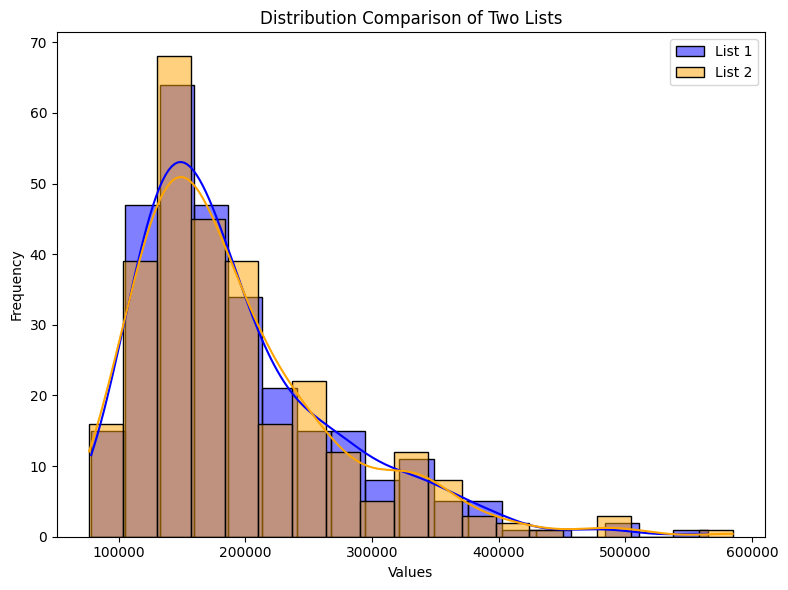

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create histograms for each list
plt.figure(figsize=(8, 6))
sns.histplot(my_result, kde=True, label='List 1', color='blue')
sns.histplot(pca_result, kde=True, label='List 2', color='orange')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution Comparison of Two Lists')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
